In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [3]:
# Defining some text formatting constants:

# Start making the text bold
F_BOLD = '\033[1m'

# Start underlining the text
F_UNDERLINE = '\033[4m'

# End text formatting
F_END = '\033[0m'

# Divider line beneath text
F_DIV = '─'*60

# Loading the dataset

In [4]:
# Reading the dataset from the CSV file
df = pd.read_csv('./billionaires.csv')

# Reporting the dimensions of the dataset
print((f"\nThe dataset consists of {F_BOLD}%d instances{F_END}" +
       f" and {F_BOLD}%d features{F_END}:\n{F_DIV}\n")
      %df.shape)

# Segmentating by the year of the data
grouped_by_year = df.groupby('year')
for key, value in grouped_by_year:
    print(f"Data from year {key} contains {value.shape[0]} instances.")


The dataset consists of 2614 instances and 22 features:
────────────────────────────────────────────────────────────

Data from year 1996 contains 423 instances.
Data from year 2001 contains 538 instances.
Data from year 2014 contains 1653 instances.


In [5]:
# Setting this option enables the presentation of all features instead of
# omitting the middle ones:
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(df.sample(5)) # Retrieves random instances from the dataset

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
2110,Ana Maria Marcondes Penido Sant'Anna,1143,2014,1945,CCR Group,relation,toll roads,new,58,female,Brazil,BRA,0.000000e+00,Latin America,inherited,1.6,0,True,Other,father,True,True
1830,Bachtiar Karim,869,2014,1932,Musim Mas,relation,oleochemicals and palm oil,new,57,male,Indonesia,IDN,0.000000e+00,East Asia,inherited,2.0,Traded Sectors,True,Non-consumer industrial,father,True,True
2468,Joseph Grendys,1465,2014,1985,Koch Foods,owner,meat processing,aquired,52,male,United States,USA,0.000000e+00,North America,executive,1.1,Traded Sectors,True,Consumer,not inherited,True,True
894,Maurice Greenberg,293,1996,1919,AIG,Chairman and Chief Executive Officer,insurance,new,70,male,United States,USA,8.100000e+12,North America,self-made finance,1.4,Financial,True,Money Management,not inherited,True,True
242,Gerald Cavendish Grosvenor,81,2014,1677,Grosvenor Group,relation,real estate,new,62,male,United Kingdom,GBR,0.000000e+00,Europe,inherited,13.0,Financial,True,Real Estate,5th generation or longer,True,True


## Features and their initial types

In [6]:
string_cols = ', '.join(df.select_dtypes(include=['object']).columns)
print(f"The {F_BOLD}string{F_END} features include:\n{F_DIV}\n" +
      f"{string_cols}\n")

numeric_cols = ', '.join(df.select_dtypes(include=['int64','float64']).columns)
print(f"The {F_BOLD}numerical{F_END} features include:\n{F_DIV}\n" +
      f"{numeric_cols}\n")

bool_cols = ', '.join(df.select_dtypes(include=['bool']).columns)
print(f"There are also several {F_BOLD}boolean{F_END} features, including:\n" +
      f"{F_DIV}\n{bool_cols}\n")

The string features include:
────────────────────────────────────────────────────────────
name, company.name, company.relationship, company.sector, company.type, demographics.gender, location.citizenship, location.country code, location.region, wealth.type, wealth.how.category, wealth.how.industry, wealth.how.inherited

The numerical features include:
────────────────────────────────────────────────────────────
rank, year, company.founded, demographics.age, location.gdp, wealth.worth in billions

There are also several boolean features, including:
────────────────────────────────────────────────────────────
wealth.how.from emerging, wealth.how.was founder, wealth.how.was political



# Data cleaning up
This includes all data cleanse measures, including:
<ul>
    <li>Identification and correction of spelling errors</li>
    <li>Making common categories (values in categorical features) consistent</li>
    <li>Identifying the missing data (sometimes denoted by value '0')</li>
    <li>Inspecting outliers</li>
    <li>Casting features to the suitable types according to the data that they contain</li>
</ul>

## Processing the Boolean features
All of these features contain only a single value (True), and as a result, they do not mandate any data cleanse tasks.

### wealth.how.from emerging

In [7]:
df['wealth.how.from emerging'].value_counts(dropna=False)

True    2614
Name: wealth.how.from emerging, dtype: int64

### wealth.how.was political

In [8]:
df['wealth.how.was political'].value_counts(dropna=False)

True    2614
Name: wealth.how.was political, dtype: int64

### wealth.how.was founder

In [9]:
df['wealth.how.was founder'].value_counts(dropna=False)

True    2614
Name: wealth.how.was founder, dtype: int64

## Processing the categorical features

### Common pre-processings
These features generally need the following <b>pre-processings</b>:
<ul>
    <li>Removing trailing and leading spaces from names</li>
    <li>Removing all consecutive spaces in the middle of the names</li>
    <li>Removing all extra dots</li>
    <li>Capitalizing the first letter of each word</li>
    <li>Transforming 'and' and '/' to ','
    <li>Correcting the spelling errors and typos</li>
</ul>

In [10]:
# The piece of code below performs all mentioned refactorings except for
# Spelling errors correction which needs to be done case by case

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(
        lambda x: ' '.join(
            x.replace('..', '.')
             .title()
             .replace(' And ', ', ')
             .replace('/', ', ')
             .split())
            if isinstance(x, str) else x
    )

### Checking and correcting spelling errors

In [11]:
# The following function receives a lists of words and maps the similar ones
# together; it is used to clean up categorical features by pinpointing the
# 'almost' similar words and consequently helping in the identification of the
# spelling errors.

from difflib import SequenceMatcher

def similar(word_list, min_similarity = .9):
    for i in range(len(word_list)):
        first_word = word_list[i]
        if pd.isna(first_word):
            continue
        res = set()
        for j in range(i+1, len(word_list)):
            second_word = word_list[j]
            if pd.isna(second_word):
                continue
            similarity = SequenceMatcher(None, first_word, second_word).ratio()
            if min_similarity <= similarity < 1:
                res.add(second_word)
        if len(res) > 0:
            print(first_word, '\n', '-'*30)
            print(res, '\n\n')

#### wealth.how.inherited

In [12]:
df['wealth.how.inherited'].value_counts(dropna=False)

Not Inherited               1688
Father                       558
3Rd Generation               210
4Th Generation                68
Spouse, Widow                 59
5Th Generation Or Longer      31
Name: wealth.how.inherited, dtype: int64

#### wealth.how.industry

In [13]:
df['wealth.how.industry'].value_counts(dropna=False)

Consumer                            471
Retail, Restaurant                  281
Real Estate                         280
Money Management                    249
Media                               219
Technology-Computer                 208
Diversified Financial               167
Energy                              132
Technology-Medical                  111
Non-Consumer Industrial             107
Constrution                          97
Mining, Metals                       90
Other                                83
Hedge Funds                          67
Private Equity, Leveraged Buyout     25
0                                    16
Venture Capital                       8
Banking                               1
Services                              1
NaN                                   1
Name: wealth.how.industry, dtype: int64

#### wealth.how.category

In [14]:
df['wealth.how.category'].value_counts(dropna=False)

Financial             800
Non-Traded Sectors    597
Traded Sectors        564
New Sectors           319
Resource Related      245
0                      85
NaN                     1
Finance                 1
Trucking                1
Energy                  1
Name: wealth.how.category, dtype: int64

#### wealth.type

In [15]:
df['wealth.type'].value_counts(dropna=False)

Inherited                953
Founder Non-Finance      713
Self-Made Finance        500
Privatized, Resources    236
Executive                190
NaN                       22
Name: wealth.type, dtype: int64

#### location.region

In [16]:
df['location.region'].value_counts(dropna=False)

North America                992
Europe                       698
East Asia                    535
Latin America                182
Middle East, North Africa    117
South Asia                    69
Sub-Saharan Africa            20
0                              1
Name: location.region, dtype: int64

#### location.country code

In [17]:
df['location.country code'].sort_values().unique()

array(['Ago', 'Are', 'Arg', 'Aus', 'Aut', 'Bel', 'Bhr', 'Bmu', 'Bra',
       'Can', 'Che', 'Chl', 'Chn', 'Col', 'Cyp', 'Cze', 'Den', 'Deu',
       'Dnk', 'Dza', 'Ecu', 'Egy', 'Esp', 'Fin', 'Fra', 'Gbr', 'Geo',
       'Ggy', 'Grc', 'Hkg', 'Idn', 'Ind', 'Irl', 'Isr', 'Ita', 'Jpn',
       'Kaz', 'Kna', 'Kor', 'Kwt', 'Lbn', 'Lie', 'Ltu', 'Mac', 'Mar',
       'Mco', 'Mex', 'Mys', 'Nga', 'Nld', 'Nor', 'Npl', 'Nzl', 'Omn',
       'Per', 'Phl', 'Pol', 'Prt', 'Rou', 'Rus', 'Sau', 'Sgp', 'Swe',
       'Swz', 'Taiwan', 'Tha', 'Tur', 'Tza', 'Uga', 'Ukr', 'Usa', 'Ven',
       'Vnm', 'Zaf'], dtype=object)

#### location.citizenship

In [18]:
df['location.citizenship'].value_counts(dropna=False)

United States    903
Germany          160
China            153
Russia           119
Japan             96
                ... 
Bahrain            1
Ecuador            1
Georgia            1
Bermuda            1
Tanzania           1
Name: location.citizenship, Length: 73, dtype: int64

#### demographics.gender

In [19]:
df['demographics.gender'].value_counts(dropna=False)

Male              2328
Female             249
NaN                 34
Married Couple       3
Name: demographics.gender, dtype: int64

#### company.type

In [20]:
df['company.type'].value_counts(dropna=False)

New                       2302
Aquired                    196
Privatization               42
NaN                         36
Subsidiary                   9
Acquired                     7
State Owned Enterprise       7
New, Aquired                 3
Merger                       3
Franchise                    2
New, Privitization           2
New Division                 1
Privatized                   1
Neew                         1
Franchise Rights             1
Joint Venture                1
Name: company.type, dtype: int64

In [21]:
df['company.type'] = df['company.type'].replace(
    {
        'Aquired': 'Acquired',
        'Neew': 'New',
        'New, Privitization': 'New, Privatization',
    }
)

#### company.sector

In [22]:
df['company.sector'].sort_values().unique()

array(['Advertising', 'Aerospace, Defense', 'Agribusiness',
       'Agriculteral', 'Agricultural Products', 'Agriculture',
       'Aigriculture', 'Air Compressors', 'Aircraft Leasing', 'Airline',
       'Airplanes', 'Airport', 'Airport Maintenance', 'Airports',
       'Alcohol', 'Aluminum', 'Aluminum, Oil', 'Animal Feed', 'Animation',
       'Antennas', 'Aplliances', 'Apparel', 'Apparel Retail',
       'Apparel, Eyewear', 'Appliances', 'Architectural Products',
       'Armaments', 'Art Dealing', 'Asset Management', 'Auto Components',
       'Auto Dealerships', 'Auto Engines', 'Auto Glass', 'Auto Parts',
       'Auto Repair', 'Auto Retail', 'Auto Sales, Energy',
       'Automobile Dealers', 'Automobiles', 'Automotive',
       'Automotive Components', 'Automotive Parts', 'Automotives',
       'Autos', 'Aviation', 'Banannas', 'Bank', 'Banking',
       'Banking, Insurance', 'Banking, Media', 'Banking, Oil, Aluminum',
       'Banking, Publishing', 'Banking, Real Estate',
       'Beauty, Hea

In [23]:
similar(df["company.sector"].sort_values().unique())

Agriculture 
 ------------------------------
{'Aigriculture'} 


Airport 
 ------------------------------
{'Airports'} 


Aplliances 
 ------------------------------
{'Appliances'} 


Automotive 
 ------------------------------
{'Automotives'} 


Cigarette 
 ------------------------------
{'Cigarettes'} 


Commodities 
 ------------------------------
{'Comodities'} 


Construcion 
 ------------------------------
{'Construction'} 


Electonics 
 ------------------------------
{'Electronics'} 


Electonics Components 
 ------------------------------
{'Electronic Componants'} 


Fertalizers 
 ------------------------------
{'Fertilizers'} 


Fertilizer 
 ------------------------------
{'Fertilizers'} 


Finace 
 ------------------------------
{'Finance'} 


Gambing 
 ------------------------------
{'Gaming'} 


Investment 
 ------------------------------
{'Investments'} 


Investments 
 ------------------------------
{'Invetsments'} 


Leveraged Buyout 
 ------------------------------
{'L

In [24]:
df['company.sector'] = df['company.sector'].replace(
    {
        'Agriculteral': 'Agricultural',
        'Aigriculture': 'Agriculture',
        'Aplliances': 'Appliances',
        'Comodities': 'Commodities',
        'Construcion': 'Construction',
        'Electonics': 'Electronics',
        'Electonics Components': 'Electronic Components',
        'Fertalizers': 'Fertilizers',
        'Finace': 'Finance',
        'Gambing': 'Gambling',
        'Invetsments': 'Investments',
        'Mutal Funds': 'Mutual Funds',
        'Telecomm': 'Telecom',
        'Electronic Componants': 'Electronic Components',
        'Food And Energy Processess': 'Food And Energy Processes',
        'Insurancei, Power': 'Insurance, Power',
    }
)

#### company.relationship

In [25]:
df['company.relationship'].sort_values().unique()

array(['Ceo', 'Chairman', 'Chairman Of Management Committee',
       'Chairman Of The Board', 'Chairman, Ceo',
       'Chairman, Chief Executive Officer', 'Chairman, Founder',
       'Chairman, Shareholder', 'Chairwomen', 'Chariman',
       'Chief Executive', 'Co-Chairman',
       'Co-Director Of Zinc, Copper, Lead', 'Coo', 'Deputy Chairman',
       'Director', 'Employee', 'Exectuitve Director',
       'Executive Chairman', 'Former Ceo', 'Former Chairman, Ceo',
       'Founder', 'Founder Ceo Owner', 'Founder, Ceo',
       'Founder, Chairman', 'Founder, Chairman, Ceo',
       'Founder, Chairwoman', 'Founder, Chairwoman, Ceo',
       'Founder, Executive Chairman', 'Founder, Executive Vice Chairman',
       'Founder, President', 'Founder, Relation',
       'Founder, Vice Chairman', 'General Director',
       'Global Head Of Real Estate', 'Head Of Board Of Directors',
       'Head Of High-Yield Bond Trading Dept',
       "Head Of Microsoft'S Application Software Group",
       'Honorary Pr

In [26]:
similar(df["company.relationship"].sort_values().unique())

Founder, Chairman 
 ------------------------------
{'Founder, Chairwoman'} 


Founder, Chairman, Ceo 
 ------------------------------
{'Founder, Chairwoman, Ceo'} 


Founder, Executive Chairman 
 ------------------------------
{'Founder, Executive Vice Chairman'} 


Lawer 
 ------------------------------
{'Lawyer'} 


Vice Chairman 
 ------------------------------
{'Vice-Chairman'} 




In [27]:
df['company.relationship'] = df['company.relationship'].replace(
    {
        'Chariman': 'Chairman',
        'Lawer': 'Lawyer',
        'Vice-Chairman': 'Vice Chairman',
    }
)

### Common post-processings
The features require the following <b>post-processings</b>:
<ul>
    <li>Replacing the value '0' with Null</li>
    <li>Casting the variable from string (object) to categorical</li>
</ul>

In [28]:
# The piece of code below performs all mentioned post-processings for all the
# string features except for 'name' which is not supposed to be transformed
# to categorical


for col in df.select_dtypes(include=['object']).columns:
    if col == 'name':
        continue
    
    # Replacing the value of '0' with Null
    df[col] = df[col].replace(
        {
            '0': None,
        }
    )

    # Casting the feature into categorical type
    df[col] = df[col].astype('category')

### Cleaning the 'name' feature
This task includes:
<ul>
    <li>Converting every 'Jr' and 'Sr' to 'Jr.' and 'Sr.'</li>
    <li>Converting every [initial] to [initial + '.']s</li>
    <li>Converting every 'And' to ','</li>
    <li>In some names 'Jr' and 'Sr' are separated by ',' and in some they are not; they should be unified</li>
</ul>

In [29]:
import re

df['name'] = (
    df['name'].replace(to_replace=r'\bSr$', regex=True, value='Sr.')
    .replace(to_replace=r'\bJr$', regex=True, value='Jr.')
    .replace(to_replace=r'\b\w\b(?!\.)', regex=True, value=r'\g<0>.')
    .replace(to_replace=r', Jr\.$', regex=True, value=' Jr.')
    .replace(to_replace=r', Sr\.$', regex=True, value=' Sr.')
)

In [30]:
# similar(df['name'])

## Processing the numerical features

In [31]:
# rank                          int64
# year                          int64
# company.founded               int64
# demographics.age              int64
# location.gdp                float64
# wealth.worth in billions    float64



In [32]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols

Index(['rank', 'year', 'company.founded', 'demographics.age', 'location.gdp',
       'wealth.worth in billions'],
      dtype='object')

### Missing values
None of the numberic features by definition can contain 0; hence, all 0s must be transformed to Null

In [33]:
total_na = df[num_cols].isna().sum().sum()

total_zero = (df[num_cols]
              .melt()
              .groupby('value')
              .size()[0])

print(f"Numerical columns contain a total of {total_na} NA values and a" +
      f" total of {total_zero} '0' values.")

Numerical columns contain a total of 0 NA values and a total of 2088 '0' values.


In [34]:
df[num_cols] = df[num_cols].replace(0, np.nan)

### Identifying outliers

In [35]:
df[num_cols].describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2574.000000,2231.000000,9.490000e+02,2614.000000
mean,599.672533,2008.411630,1954.621989,62.498431,4.872956e+12,3.531943
std,467.885695,7.483598,43.189003,13.395330,4.420257e+12,5.088813
min,1.000000,1996.000000,1610.000000,-42.000000,2.491801e+09,1.000000
25%,215.000000,2001.000000,1938.250000,53.000000,3.970000e+11,1.400000
50%,430.000000,2014.000000,1963.000000,62.000000,2.500000e+12,2.000000
75%,988.000000,2014.000000,1985.000000,72.000000,1.060000e+13,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


In [36]:
def get_outliers(col):
    return col

col = df['demographics.age']
outliers = col[np.abs(col-col.mean()) > (2*col.std())]
outliers_count = outliers.shape[0]
print(f"The {F_BOLD}demographics.age{F_END} feature contains {outliers_count} outliers." +
      f" The outliers include:\n{F_DIV}\n{outliers.sort_values()}")

The demographics.age feature contains 81 outliers. The outliers include:
────────────────────────────────────────────────────────────
748    -42.0
1065    -7.0
788     12.0
1262    21.0
2303    24.0
        ... 
1663    95.0
2127    95.0
993     96.0
924     96.0
1539    98.0
Name: demographics.age, Length: 81, dtype: float64


#### demographics.age

In [37]:
df.loc[[748, 1065]][['name', 'year', 'demographics.age']]

,name,year,demographics.age
748,Kunio Busujima,1996,-42.0
1065,Kenichi Mabuchi,1996,-7.0


In [38]:
df.loc[748, ['demographics.age']] = 71
df.loc[1065, ['demographics.age']] = 63

# Data visualization

## Most and least rich billionairs and their country by year

In [255]:
df_grouped = df.groupby('year')[
    ['name', 
     'location.citizenship',
     'wealth.worth in billions']]

for year, data in df_grouped:
    data_sorted = data.sort_values(
        'wealth.worth in billions', ascending=False)
    print(f"Year {year}\n{F_DIV}\n" + 
          f"{data_sorted.iloc[[0, -1]]}\n")

Year 1996
────────────────────────────────────────────────────────────
             name location.citizenship  wealth.worth in billions
0      Bill Gates        United States                      18.5
1298  Carl Pohlad        United States                       1.0

Year 2001
────────────────────────────────────────────────────────────
                    name location.citizenship  wealth.worth in billions
1             Bill Gates        United States                      58.7
1459  William Hearst Iii        United States                       1.0

Year 2014
────────────────────────────────────────────────────────────
             name location.citizenship  wealth.worth in billions
2      Bill Gates        United States                      76.0
2613  Zhu Wenchen                China                       1.0



## Total number of billionaires by year of data

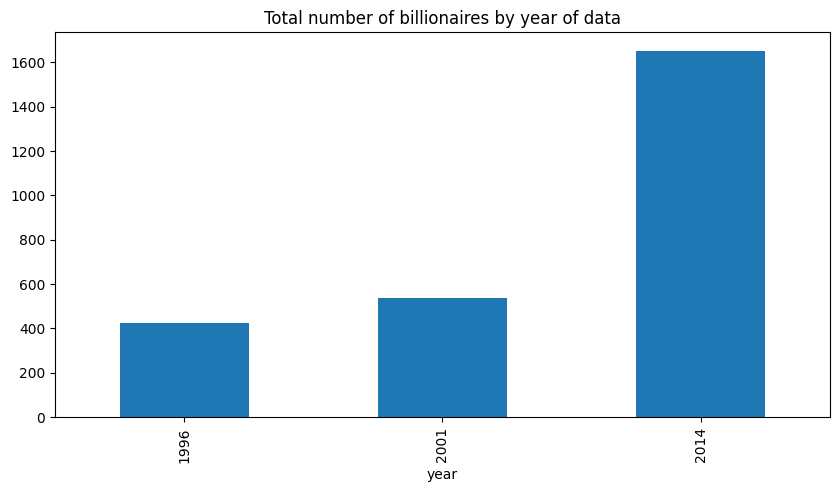

In [259]:
p = df.groupby('year')['name'].count().plot(
    kind='bar',
    title="Total number of billionaires by year of data",
    figsize=(10,5))

## Categorical features frequencies

In [272]:
df.select_dtypes(include='category').columns

Index(['company.name', 'company.relationship', 'company.sector',
       'company.type', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.region', 'wealth.type',
       'wealth.how.category', 'wealth.how.industry', 'wealth.how.inherited'],
      dtype='object')

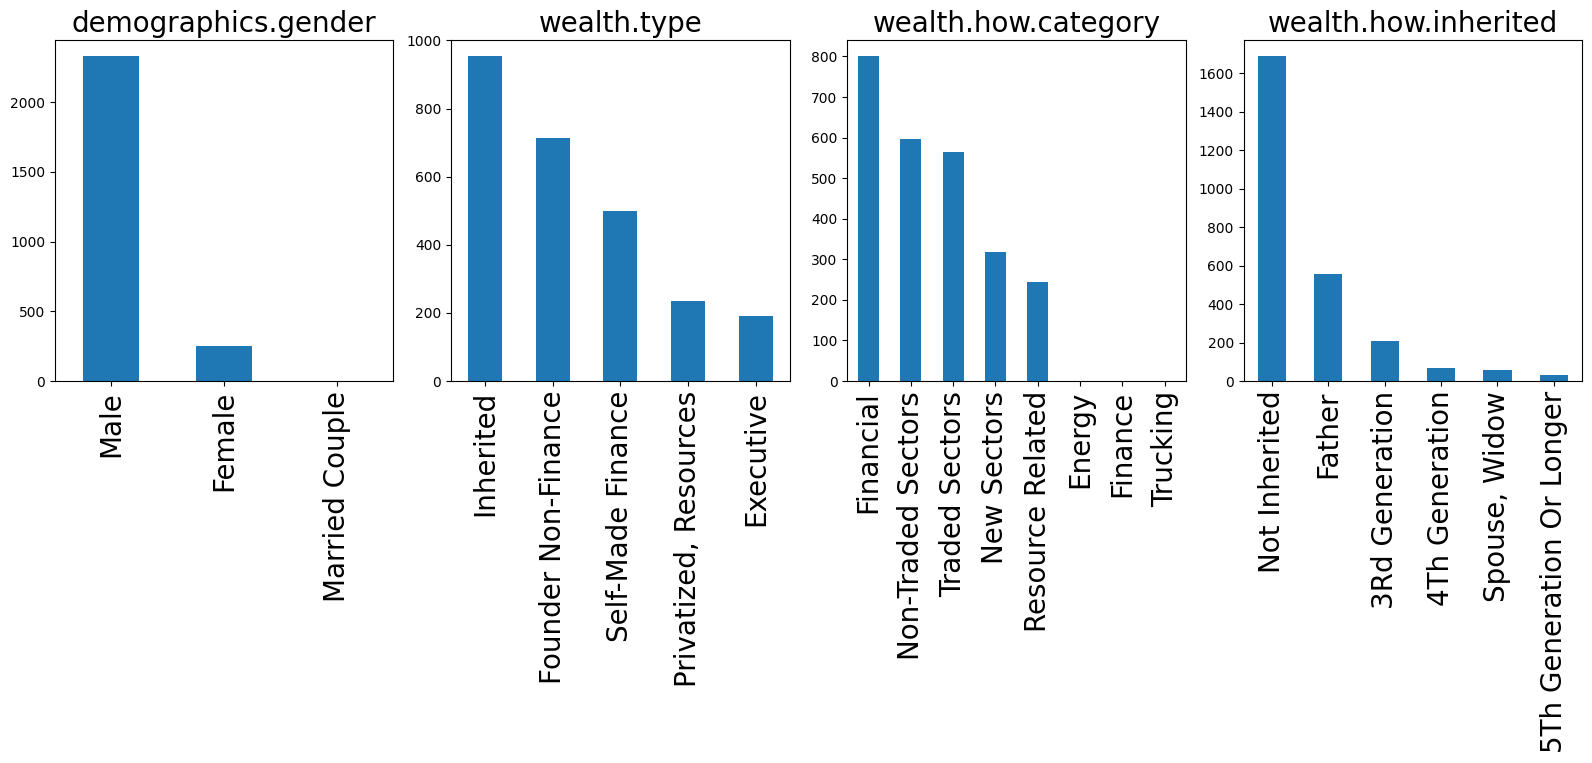

In [300]:
# df.select_dtypes(include='category').hist()

cols = [
    'demographics.gender',
    'wealth.type',
    'wealth.how.category',
    'wealth.how.inherited'
]
fig, ax = plt.subplots(1, 4,figsize=(16, 4))
fig.tight_layout()
cur_col = 0
for col in df[cols]:
    df[col].value_counts().plot(kind="bar", 
                                ax=ax[cur_col])
    ax[cur_col].tick_params(axis='x', which='major', labelsize=20)
    ax[cur_col].set_title(col, size=20)
    cur_ax.tick_params(axis='y', which='major', labelsize=14)    
    cur_col += 1

# Answering the questions from the assignment brief

## Q1: What are the top ten countries with the highest number of billionaires?

In [39]:
# grouping the dataframe by country
df_grouped = df.groupby('year')['location.citizenship']

top_tens = dict()
for year, countries in df_grouped:
    top_tens[year] = (countries.value_counts()
                               .nlargest(10)
                               .rename_axis('country')
                               .reset_index(name='total'))
    print(f"year: {year}\n{F_DIV}\n{top_tens[year]}\n")

year: 1996
────────────────────────────────────────────────────────────
         country  total
0  United States    135
1        Germany     47
2          Japan     40
3      Hong Kong     18
4         Mexico     15
5         France     14
6    Switzerland     13
7       Malaysia     11
8         Brazil     10
9       Thailand     10

year: 2001
────────────────────────────────────────────────────────────
          country  total
0   United States    269
1           Japan     29
2         Germany     28
3           Italy     17
4     Switzerland     16
5          Canada     16
6          France     15
7       Hong Kong     14
8          Mexico     13
9  United Kingdom     12

year: 2014
────────────────────────────────────────────────────────────
          country  total
0   United States    499
1           China    152
2          Russia    111
3         Germany     85
4          Brazil     65
5           India     56
6  United Kingdom     47
7       Hong Kong     45
8          France 

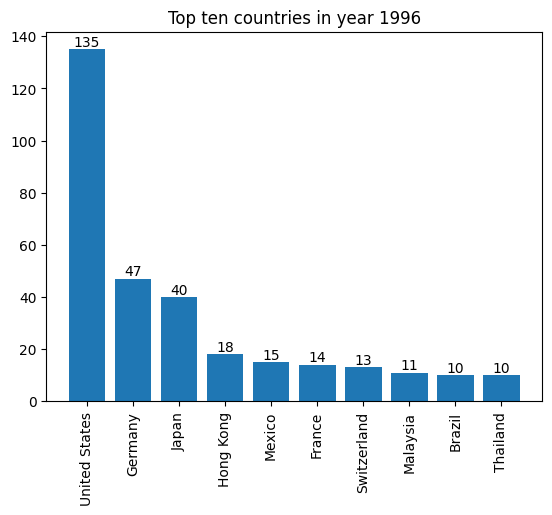

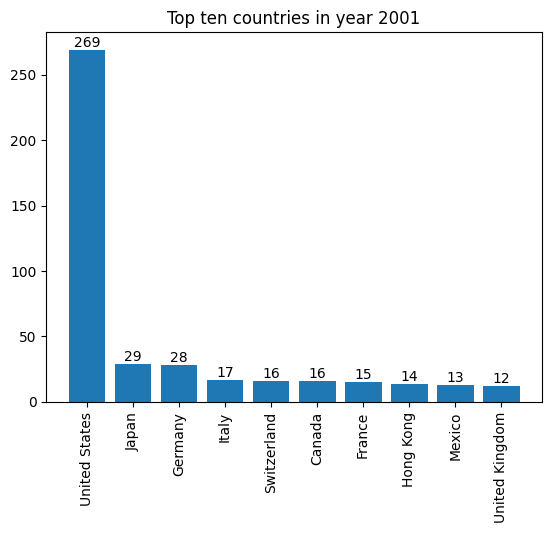

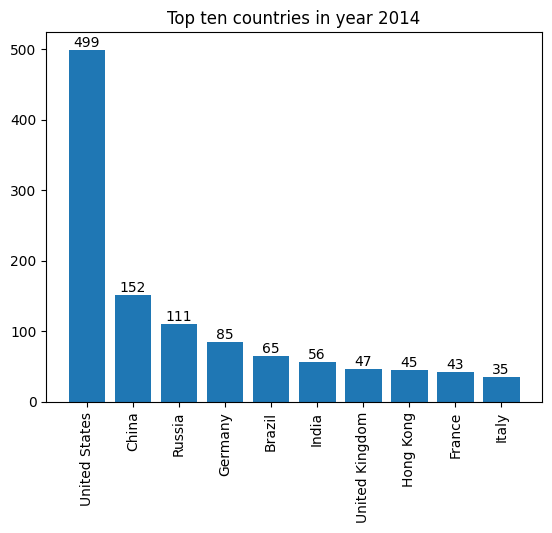

In [40]:
for year, top_ten in top_tens.items():
    fig, ax = plt.subplots()
    bars = ax.bar(top_ten['country'], top_ten['total'], )
    ax.bar_label(bars)
    plt.xticks(rotation=90)
    plt.title(f"Top ten countries in year {year}")

## Q2: What industries/sectors are most successful?

In [41]:
cols = [
    'year',
    'wealth.how.industry',
    'company.sector',
]

df_grouped = df[cols].groupby('year')
df_industries = df_grouped['wealth.how.industry']
df_sectors = df_grouped['company.sector']

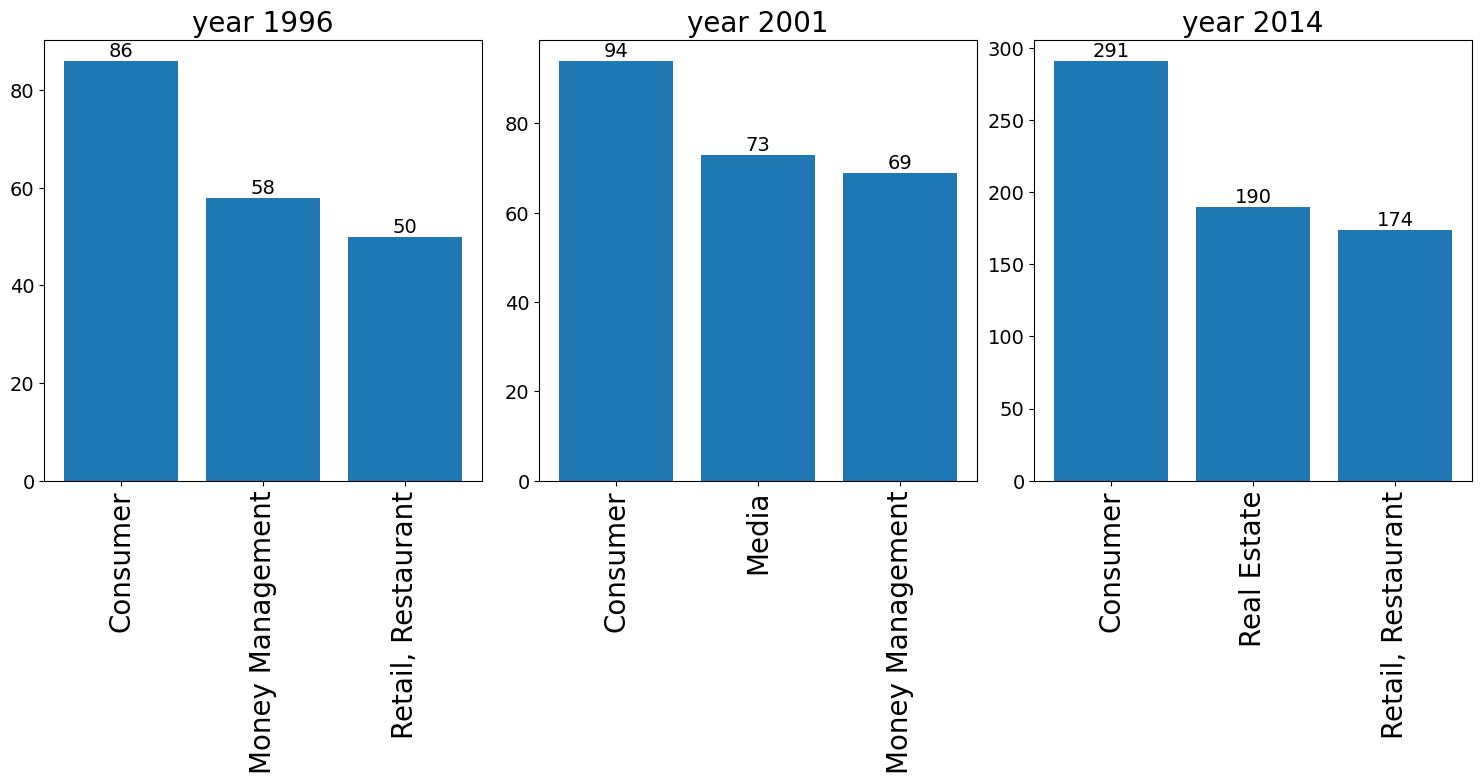

In [42]:
fig, ax = plt.subplots(1, 3,constrained_layout=True, figsize=(15, 5))
fig.tight_layout()
subplot_idx = 0
for year, industries in df_industries:
    top_3 = (industries.value_counts()
                       .rename_axis('industry')
                       .reset_index(name='total')
                       .head(3))
    cur_ax = ax[subplot_idx]
    subplot_idx += 1
    bars = cur_ax.bar(top_3['industry'], top_3['total'])
    cur_ax.bar_label(bars, size=14)
    cur_ax.tick_params(axis='x', labelrotation=90)
    cur_ax.set_title(f"year {year}", size=20)
    cur_ax.tick_params(axis='x', which='major', labelsize=20)
    cur_ax.tick_params(axis='y', which='major', labelsize=14)    

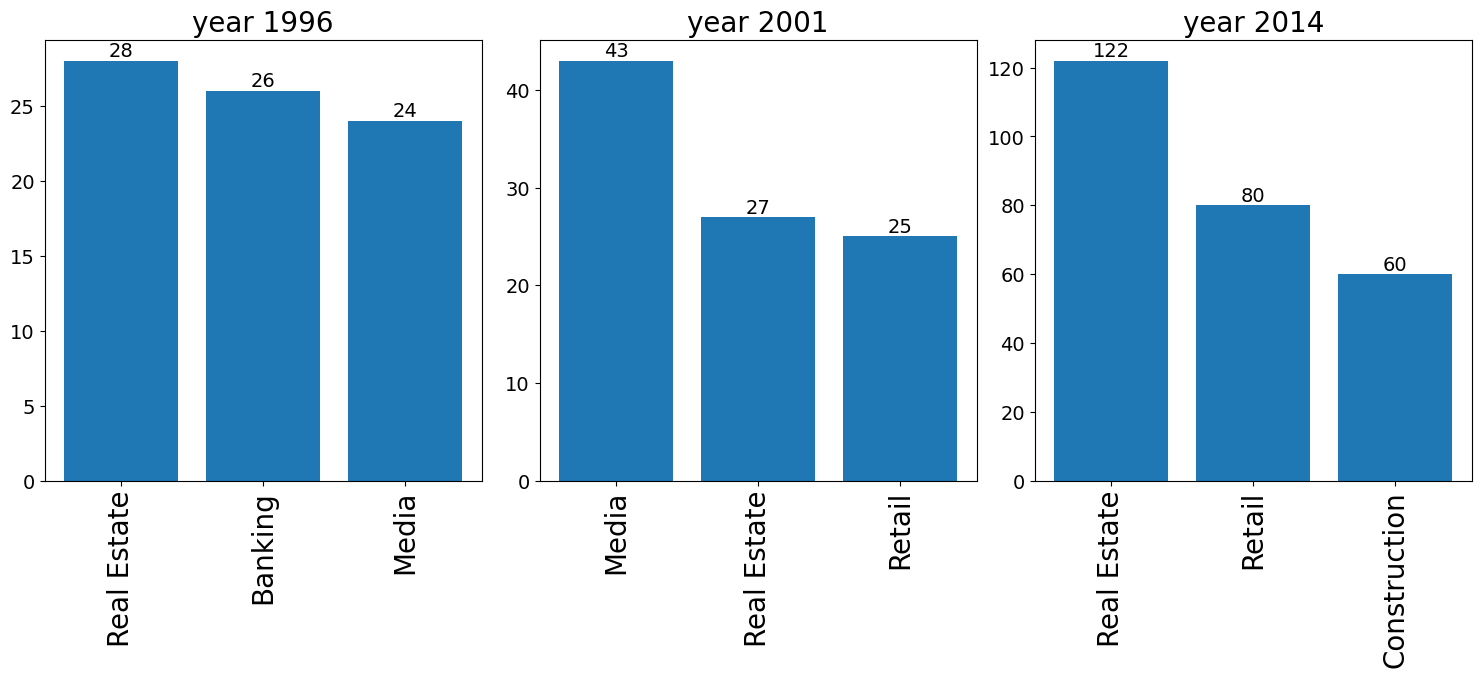

In [43]:
fig, ax = plt.subplots(1, 3,constrained_layout=True, figsize=(15, 5))
fig.tight_layout()
subplot_idx = 0
for year, sectors in df_sectors:
    top_3 = (sectors.value_counts()
                       .rename_axis('industry')
                       .reset_index(name='total')
                       .head(3))
    cur_ax = ax[subplot_idx]
    subplot_idx += 1
    bars = cur_ax.bar(top_3['industry'], top_3['total'])
    cur_ax.bar_label(bars, size=14)
    cur_ax.tick_params(axis='x', labelrotation=90)
    cur_ax.set_title(f"year {year}", size=20)
    cur_ax.tick_params(axis='x', which='major', labelsize=20)
    cur_ax.tick_params(axis='y', which='major', labelsize=14)    

## Q3: What are the main industries with the highest number of women billionaires?

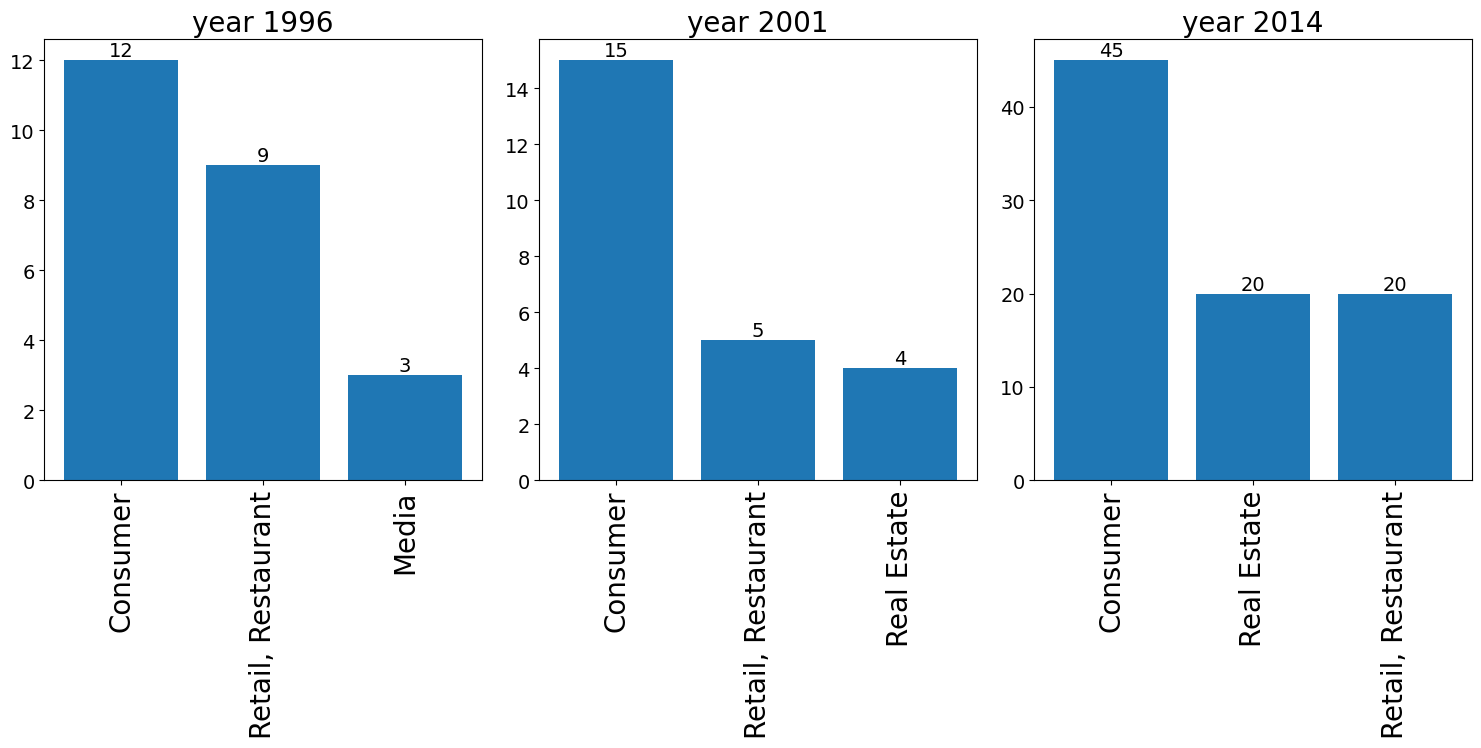

In [44]:
df_filtered = df[df['demographics.gender'] == 'Female'][
    ['year', 'wealth.how.industry']]
df_grouped = df_filtered.groupby('year')['wealth.how.industry']

fig, ax = plt.subplots(1, 3,constrained_layout=True, figsize=(15, 5))
fig.tight_layout()
subplot_idx = 0
for year, industries in df_grouped:
    top_3 = (industries.value_counts()
                       .rename_axis('industry')
                       .reset_index(name='total')
                       .head(3))
    cur_ax = ax[subplot_idx]
    subplot_idx += 1
    bars = cur_ax.bar(top_3['industry'], top_3['total'])
    cur_ax.bar_label(bars, size=14)
    cur_ax.tick_params(axis='x', labelrotation=90)
    cur_ax.set_title(f"year {year}", size=20)
    cur_ax.tick_params(axis='x', which='major', labelsize=20)
    cur_ax.tick_params(axis='y', which='major', labelsize=14)    

## Q4: What age range represents the highest and lowest number of billionaires?

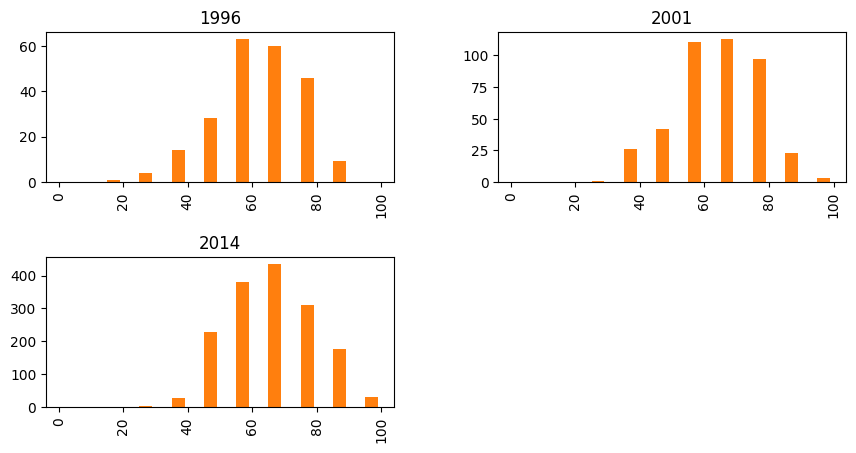

In [45]:
ax = df[['year', 'demographics.age']].hist(
            by='year',
            bins=range(0, 101, 10),
            figsize=(10, 5))

# Hypothesis test

## First hypothesis

<b>Research question:</b>How do the total number of billionaires and their gross wealth in different eras correlate with the country’s GDP?<br>
<b>Null hypothesis:</b>Trends of change in a country’s GDP are in no correlation with the total number and aggregate wealth of billionaires.<br>
<b>Alternate hypothesis:</b>increase or decline in a country’s GDP is in correlation with its number of billionaires and their total sum of wealth.

In [215]:
from functools import reduce

# Removing instances without GDP and limiting to required features
df_has_gdp = df[~pd.isna(df['location.gdp'])][
    [
        'year',
        'location.citizenship',
        'location.gdp',
        'wealth.worth in billions'
    ]]

# listing the years of data
years = df_has_gdp['year'].unique().tolist()

# Partitioning dataframe by year
df_groupby_year = df_has_gdp[cols].groupby('year')

# Extracting names of countries in all years
countries_per_years = [
    set(
        df_groupby_year.get_group(idx)['location.citizenship'].unique()
    ) for idx in years]
selected_countries = reduce(
    lambda x, y: x.intersection(y), countries_per_years)

print(selected_countries)

{'Ireland', 'Malaysia', 'Spain', 'United States', 'South Korea', 'France', 'South Africa', 'Italy', 'Indonesia', 'Switzerland', 'Liechtenstein', 'Greece', 'Hong Kong', 'Venezuela', 'Argentina', 'Australia', 'Colombia', 'United Kingdom', 'Denmark', 'Thailand', 'Lebanon', 'Kuwait', 'India', 'Saudi Arabia', 'Singapore', 'Brazil', 'Netherlands', 'Mexico', 'Japan', 'Canada', 'Germany', 'Philippines', 'Sweden', 'Turkey', 'Israel', 'Chile'}


In [219]:
# Limiting the dataframe to countries that are in all years of data
df_all_years = (df_has_gdp[df_has_gdp['location.citizenship']
                           .isin(selected_countries)])

# Calculating the mean GDP of each year
df_all_years['mean_gdp'] = df_all_years['year'].apply(
    lambda x: (
        df_all_years[df_all_years['year'] == x]
        .drop_duplicates(subset=['location.citizenship'])
        .sum(numeric_only=True)['location.gdp']) / len(selected_countries))

df_result = df_all_years.groupby('year').agg(
    total_wealth = ('wealth.worth in billions', np.sum),
    mean_gdp = ('mean_gdp', np.mean),
    billionaires_count = ('year', 'count'))


df_result = df_result.reset_index()
df_result

,year,total_wealth,mean_gdp,billionaires_count
0,1996,1021.4,7.483582e+11,413
1,2001,1691.0,7.815795e+11,515


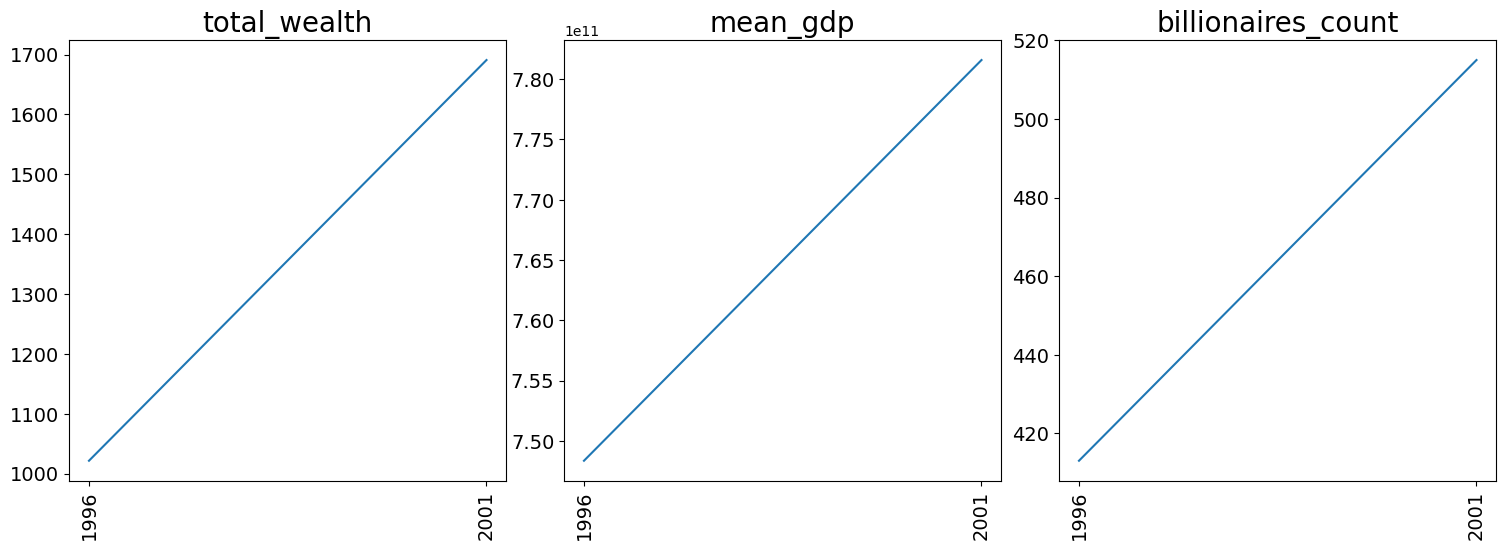

In [212]:
fig, ax = plt.subplots(1, 3,constrained_layout=True, figsize=(15, 5))
fig.tight_layout()
subplot_idx = 0
for col in ['total_wealth','mean_gdp','billionaires_count']:
    cur_ax = ax[subplot_idx]
    subplot_idx += 1
    lines = cur_ax.plot(df_result['year'], df_result[col])
    cur_ax.set_xticks(years, size=10)
    cur_ax.tick_params(axis='x', labelrotation=90)
    cur_ax.set_title(col, size=20)
    cur_ax.tick_params(axis='x', which='major', labelsize=14)
    cur_ax.tick_params(axis='y', which='major', labelsize=14)    

## Second hypothesis

<b>Research question:</b>How does the years of activity of the company affect the growth or decline of the billionaire’s wealth over time?<br>
<b>Null hypothesis:</b>There is no deterministic way to formulate the success of a billionaire in accordance with the age of the company.<br>
<b>Alternate hypothesis:</b>The success of the billionaire is correlated with the age of their corresponding company.

In [231]:
from functools import reduce

# listing the years of data
years = df['year'].unique().tolist()

# Partitioning dataframe by year
df_groupby_year = df.groupby('year')

# Extracting names of countries in all years
billionaires_per_years = [
    set(
        df_groupby_year.get_group(idx)['name'].unique()
    ) for idx in years]
selected_billionaires = reduce(
    lambda x, y: x.intersection(y), billionaires_per_years)

print(f"Total of {len(selected_billionaires)} billionaires are present in" + 
      f" all the years of {', '.join(map(str,years))}.")

Total of 137 billionaires are present in all the years of 1996, 2001, 2014.


In [241]:
from datetime import datetime

# Filtering the dataframe to the list of selected billionaires
df_filtered = (df[df['name'].isin(selected_billionaires)][
    [
        'company.founded',
        'wealth.worth in billions'
    ]])

# Computing the age of the companires
cur_year = datetime.now().year
df_filtered['company_age'] = cur_year - df['company.founded']

df_filtered.drop('company.founded', axis='columns')

df_filtered.corr()

,company.founded,wealth.worth in billions,company_age
company.founded,1.000000,0.049158,-1.000000
wealth.worth in billions,0.049158,1.000000,-0.049158
company_age,-1.000000,-0.049158,1.000000
